<a href="https://colab.research.google.com/github/ibonetc/VisionAPI_TensorFlow_Python/blob/master/IA__DL_Ejemplo2_GatosPerros_DataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo usando Keras con la base de datos de perros y gatos

Enlace de datos: 
[Descargue la base de datos aquí](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data)

In [ ]:
from sklearn.datasets import load_files       
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
import os

## Cargando archivos desde Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Como el fichero está comprimido con .zip, se ejecuta la siguiente instrucción para descomprimirlo

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/DatasetsAnalytics/Gatos_Perros.zip"

Archive:  /content/drive/MyDrive/Datasets/DatasetsAnalytics/Gatos_Perros.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
!unzip "/content/test.zip"
!unzip "/content/train.zip"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/do

In [ ]:
glob.glob('/content/train/*.jpg')

['/content/train/cat.7994.jpg',
 '/content/train/cat.10354.jpg',
 '/content/train/cat.3335.jpg',
 '/content/train/cat.5592.jpg',
 '/content/train/dog.872.jpg',
 '/content/train/cat.806.jpg',
 '/content/train/dog.5613.jpg',
 '/content/train/cat.11398.jpg',
 '/content/train/cat.8370.jpg',
 '/content/train/cat.5645.jpg',
 '/content/train/cat.9653.jpg',
 '/content/train/dog.8895.jpg',
 '/content/train/dog.11818.jpg',
 '/content/train/dog.422.jpg',
 '/content/train/dog.3137.jpg',
 '/content/train/cat.4583.jpg',
 '/content/train/dog.8995.jpg',
 '/content/train/dog.7542.jpg',
 '/content/train/dog.4105.jpg',
 '/content/train/cat.5125.jpg',
 '/content/train/cat.7539.jpg',
 '/content/train/cat.696.jpg',
 '/content/train/cat.7051.jpg',
 '/content/train/dog.8297.jpg',
 '/content/train/dog.12363.jpg',
 '/content/train/dog.137.jpg',
 '/content/train/dog.4458.jpg',
 '/content/train/dog.10140.jpg',
 '/content/train/dog.9508.jpg',
 '/content/train/cat.4690.jpg',
 '/content/train/cat.9172.jpg',
 '/conte

In [ ]:
fnames_train = np.array(glob.glob('/content/train/*.jpg'))
labels_train = np.array([(0 if 'cat' in fname else 1) for fname in fnames_train])

In [ ]:
fnames_train

array(['/content/train/cat.7994.jpg', '/content/train/cat.10354.jpg',
       '/content/train/cat.3335.jpg', ..., '/content/train/dog.1444.jpg',
       '/content/train/cat.12179.jpg', '/content/train/dog.11267.jpg'],
      dtype='<U28')

In [ ]:
labels_train

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
np.unique(labels_train,return_counts=True)

(array([0, 1]), array([12500, 12500]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gatos y Perros')

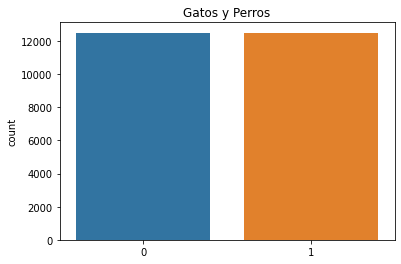

In [ ]:
sns.countplot(labels_train)
plt.title('Gatos y Perros')

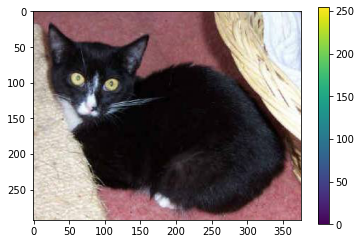

In [ ]:
img = plt.imread(fnames_train[0])
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [ ]:
img.shape

(293, 376, 3)

Ahora carguemos los datos de prueba

## Creando el conjunto de entrenamiento y prueba
* Necesitamos cargar las imágenes.
* Reescalarlas, porque no tienen el mimo tamaño, por ejemplo acá vamos a ponerlas de 64x64 y con canal 3

### Cargando datos manualmente (Esta opción puede llenar la RAM)

In [ ]:
def read_image(file_path, ROWS = 64,COLS = 64):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS))

In [ ]:
def prep_data(images, ROWS = 64,COLS = 64,CHANNELS=3):
  count = len(images)
  data = np.ndarray((count, ROWS, COLS, CHANNELS))
  for i, image_file in enumerate(images):
    image = read_image(image_file,ROWS,COLS)
    data[i] = image   
  return data

In [ ]:
ROWS = 64
COLS = 64
CHANNELS = 3
#train = prep_data(fnames_train,ROWS=ROWS,COLS=COLS)

In [ ]:
#train.shape

(25000, 64, 64, 3)

In [ ]:
#train=train/255.0

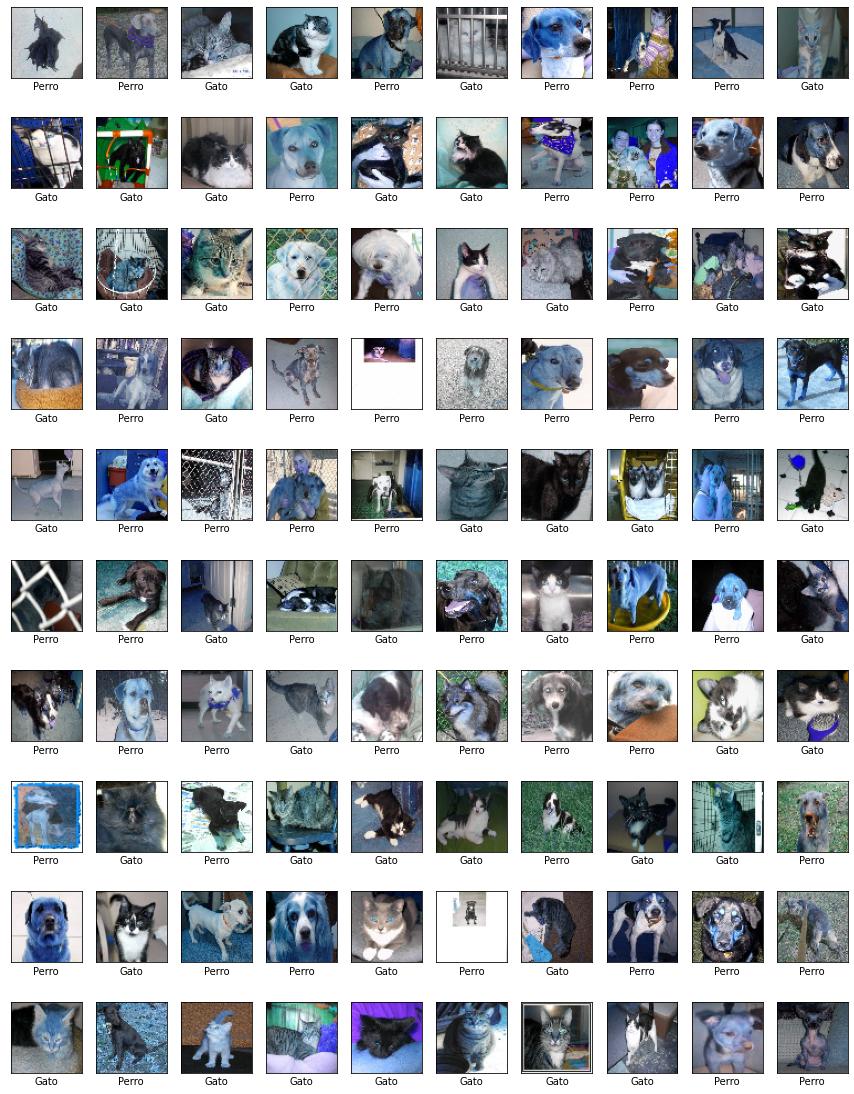

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i])
    plt.xlabel('Gato' if labels_train[i]==0 else 'Perro')
plt.show()

### Cargando los datos con ImageDataGenerator

Para cargar los datos con ImageDataGenerator necesitamos tener o los datos separados por carpetas o un Dataframe



In [ ]:
import pandas as pd

In [ ]:
labels = np.array([('cat' if 'cat' in fname else 'dog') for fname in fnames_train])

In [ ]:
df=pd.DataFrame({'images':fnames_train, 'class':labels})
df

images class
0       /content/train/cat.7994.jpg   cat
1      /content/train/cat.10354.jpg   cat
2       /content/train/cat.3335.jpg   cat
3       /content/train/cat.5592.jpg   cat
4        /content/train/dog.872.jpg   dog
...                             ...   ...
24995   /content/train/cat.2540.jpg   cat
24996   /content/train/cat.1830.jpg   cat
24997   /content/train/dog.1444.jpg   dog
24998  /content/train/cat.12179.jpg   cat
24999  /content/train/dog.11267.jpg   dog

[25000 rows x 2 columns]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [ ]:
train_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="training",
batch_size=64,
seed=5,
shuffle=True,
class_mode='binary',
target_size=(64,64))

Found 18750 validated image filenames belonging to 2 classes.


In [ ]:
validation_generator=datagen.flow_from_dataframe(
dataframe=df,
x_col="images",
y_col="class",
subset="validation",
batch_size=64,
seed=5,
shuffle=False,
class_mode='binary',
target_size=(64,64))

Found 6250 validated image filenames belonging to 2 classes.


## Creando modelo
Definamos el siguiente modelo de red neuronal:

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Como el test no tiene labels, para poder validar el modelo vamos a dividir el entrenamiento en 80% para entrenar y 20% para validar

In [ ]:
epochs=10
history = classifier.fit(train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/10
293/293 [==============================] - 66s 224ms/step - loss: 0.4949 - accuracy: 0.7609 - val_loss: 0.4676 - val_accuracy: 0.7778
Epoch 2/10
293/293 [==============================] - 65s 223ms/step - loss: 0.4521 - accuracy: 0.7904 - val_loss: 0.4642 - val_accuracy: 0.7835
Epoch 3/10
293/293 [==============================] - 64s 217ms/step - loss: 0.4165 - accuracy: 0.8077 - val_loss: 0.4587 - val_accuracy: 0.7805
Epoch 4/10
293/293 [==============================] - 65s 222ms/step - loss: 0.3791 - accuracy: 0.8300 - val_loss: 0.5335 - val_accuracy: 0.7520
Epoch 5/10
293/293 [==============================] - 65s 222ms/step - loss: 0.3438 - accuracy: 0.8451 - val_loss: 0.4454 - val_accuracy: 0.7973
Epoch 6/10
293/293 [==============================] - 64s 218ms/step - loss: 0.2963 - accuracy: 0.8744 - val_loss: 0.4593 - val_accuracy: 0.7950
Epoch 7/10
293/293 [==============================] - 64s 219ms/step - loss: 0.2463 - accuracy: 0.8964 - val_loss: 0.4855 - val_ac

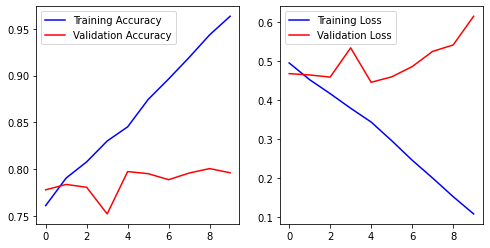

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
predictions=classifier.predict(validation_generator)

In [ ]:
predictions_label=[0 if p<0.5 else 1 for p in predictions]

In [ ]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

Para acceder a los labels del conjunto de validación

In [ ]:
labels_test=validation_generator.labels
labels_test

In [ ]:
data_val=validation_generator.filepaths

In [ ]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

Text(0.5, 0, 'Gato  0 (Gato)')

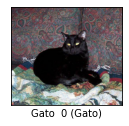

In [ ]:
index_image=10
plt.figure(figsize=(2,2))
plt.grid(False)
plt.xticks([])
plt.yticks([])
im=plt.imread(data_val[index_image])
plt.imshow(im)

predicted_label = "Gato" if predictions[index_image][0]<0.5 else "Perro"
real_label="Gato" if labels_test[index_image]==0 else "Perro"
plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                              predictions[index_image][0],
                              real_label))

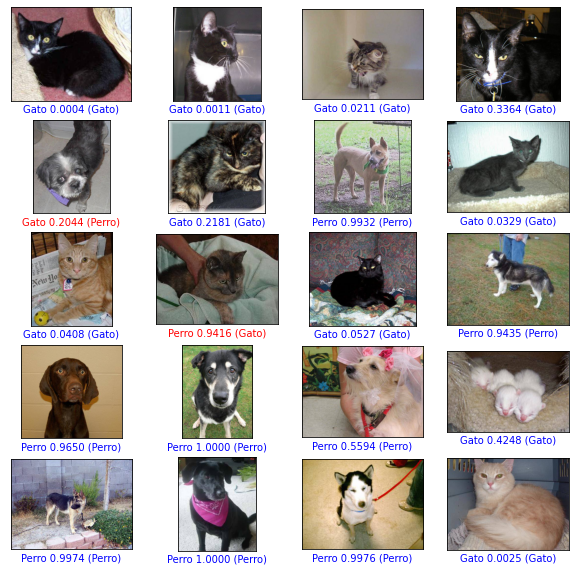

In [ ]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  im=plt.imread(data_val[index_image])
  plt.imshow(im)

  predicted_label = "Gato" if predictions[index_image][0]<0.5 else "Perro"
  real_label="Gato" if labels_test[index_image]==0 else "Perro"
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel("{} {:2.0f} ({})".format(predicted_label,
                                predictions[index_image][0],
                                real_label))
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image][0]):.4f} ({real_label})', color=color)

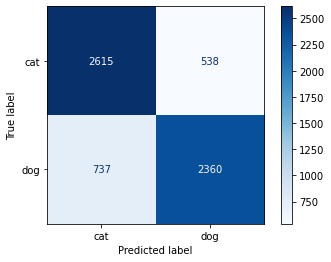

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm
train_generator.class_indices
classes=list(train_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
error = 1 - accuracy
print(accuracy, error)


0.796 0.20399999999999996


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(labels_test, predictions_label, target_names=classes))

              precision    recall  f1-score   support

         cat       0.78      0.83      0.80      3153
         dog       0.81      0.76      0.79      3097

    accuracy                           0.80      6250
   macro avg       0.80      0.80      0.80      6250
weighted avg       0.80      0.80      0.80      6250



## Un modelo más complejo

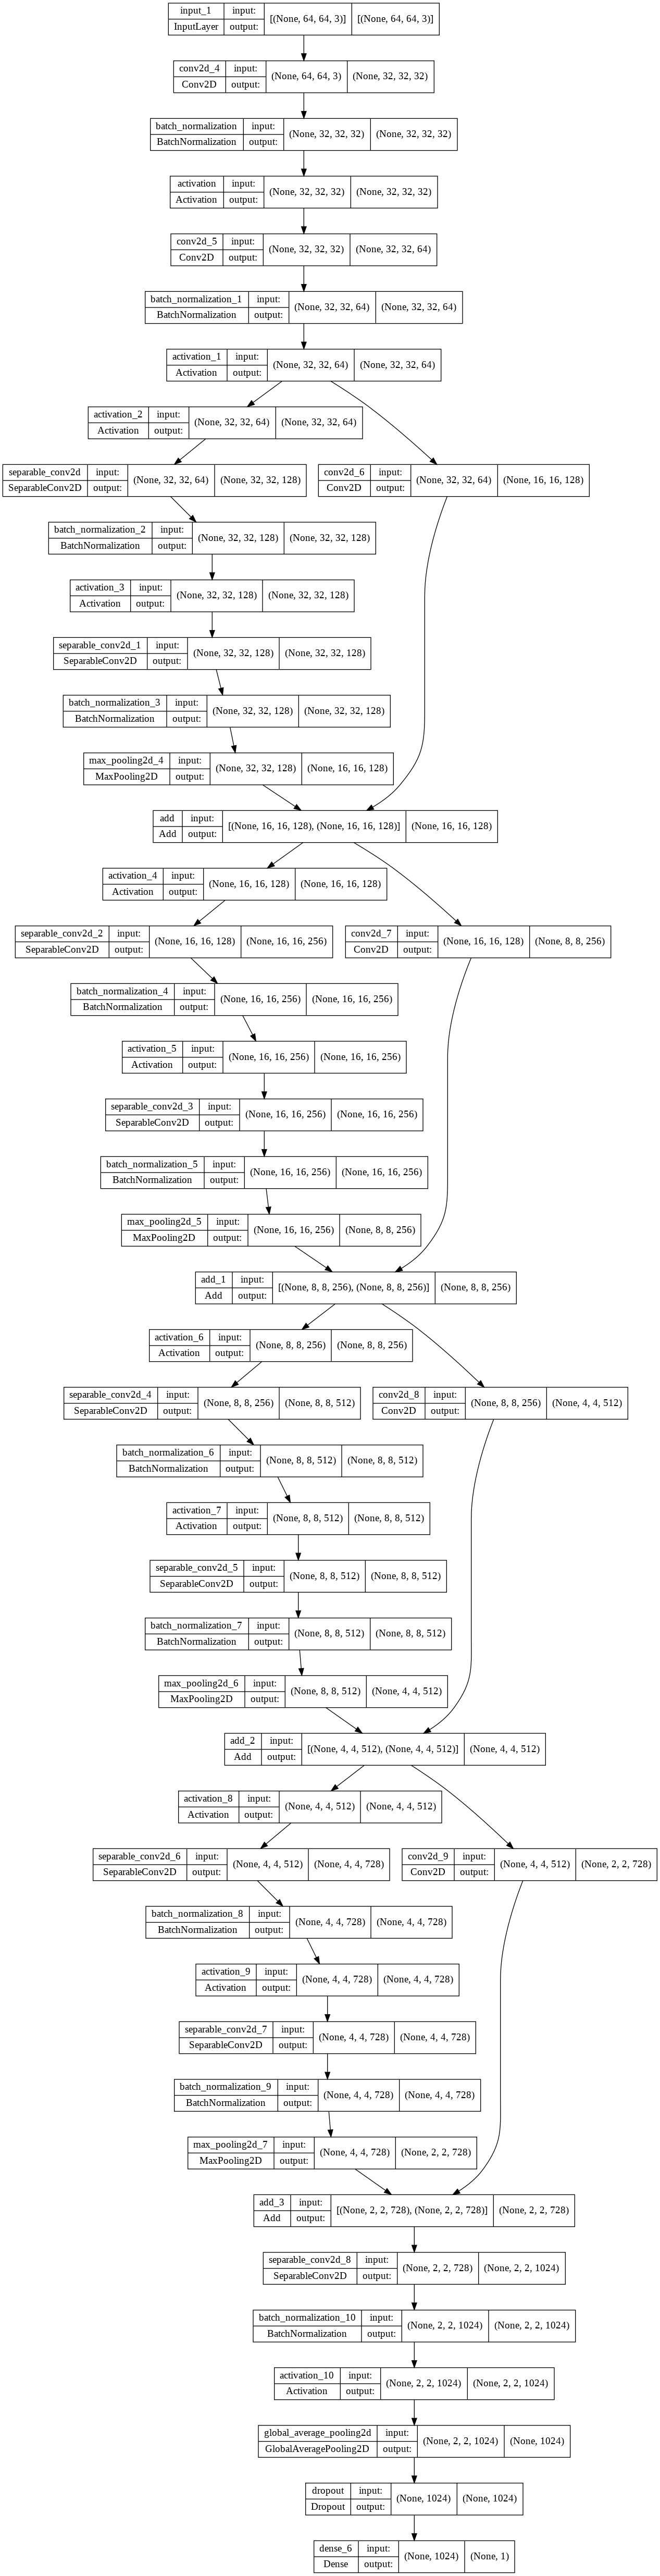

In [ ]:
input_shape=train.shape[1:4]
num_classes=2

inputs = keras.Input(shape=input_shape)

x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(64, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

previous_block_activation = x 

for size in [128, 256, 512, 728]:
  x = layers.Activation("relu")(x)
  x = layers.SeparableConv2D(size, 3, padding="same")(x)
  x = layers.BatchNormalization()(x)

  x = layers.Activation("relu")(x)
  x = layers.SeparableConv2D(size, 3, padding="same")(x)
  x = layers.BatchNormalization()(x)

  x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

  residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
  x = layers.add([x, residual])  # Add back residual
  previous_block_activation = x  # Set aside next residual

x = layers.SeparableConv2D(1024, 3, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model= keras.Model(inputs, outputs)

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint("save_last_model.h5")]
history=model.fit(train_generator, epochs=20, callbacks=callbacks, validation_data=validation_generator)

Epoch 1/20
625/625 [==============================] - 43s 64ms/step - loss: 0.5807 - accuracy: 0.6974 - val_loss: 0.4965 - val_accuracy: 0.7582
Epoch 2/20
625/625 [==============================] - 39s 62ms/step - loss: 0.4126 - accuracy: 0.8129 - val_loss: 0.3892 - val_accuracy: 0.8340
Epoch 3/20
625/625 [==============================] - 38s 61ms/step - loss: 0.3375 - accuracy: 0.8524 - val_loss: 1.7246 - val_accuracy: 0.5588
Epoch 4/20
625/625 [==============================] - 38s 61ms/step - loss: 0.2804 - accuracy: 0.8816 - val_loss: 0.4889 - val_accuracy: 0.7960
Epoch 5/20
625/625 [==============================] - 39s 62ms/step - loss: 0.2348 - accuracy: 0.9036 - val_loss: 0.4033 - val_accuracy: 0.8328
Epoch 6/20
625/625 [==============================] - 38s 61ms/step - loss: 0.1973 - accuracy: 0.9179 - val_loss: 0.3946 - val_accuracy: 0.8376
Epoch 7/20
625/625 [==============================] - 38s 61ms/step - loss: 0.1633 - accuracy: 0.9341 - val_loss: 0.4848 - val_accuracy:

In [ ]:
model.evaluate(validation_generator)

157/157 [==============================] - 3s 17ms/step - loss: 0.5889 - accuracy: 0.8416


[0.5889235734939575, 0.8416000008583069]

## Transferencia de aprendizaje (usando otras redes entrenadas)

Lo mejor para cargar los datos es cargarlo por batch, pero para esto deben estar separadas en carpetas, que no es este caso.

Para separar las imágenes en carpetas con el nombre de las clases, vamos a crear carpetas y dividirlas

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Otra opción para separar los datos

In [ ]:
dataset_home = '/content/dataset_dogs_vs_cats/'

labeldirs = ['dogs/', 'cats/']
for labldir in labeldirs:
	newdir = dataset_home + labldir
	makedirs(newdir, exist_ok=True)

src_directory = '/content/train'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('cat'):
		dst = dataset_home + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + 'dogs/'  + file
		copyfile(src, dst)

Para poder dividirlo en entrenamiento y validación, vamos a pasarlos con un aleatorio

In [ ]:
dataset_home = '/content/data_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

seed(1)

val_ratio = 0.2
src_directory = '/content/train'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
batch_size=32
train_it = datagen.flow_from_directory('/content/data_dogs_vs_cats/train', class_mode='binary', batch_size=batch_size, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/data_dogs_vs_cats/test', class_mode='binary', batch_size=batch_size, target_size=(224, 224),shuffle=False)

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
base_modelResNet50=ResNet50(pooling='max', weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


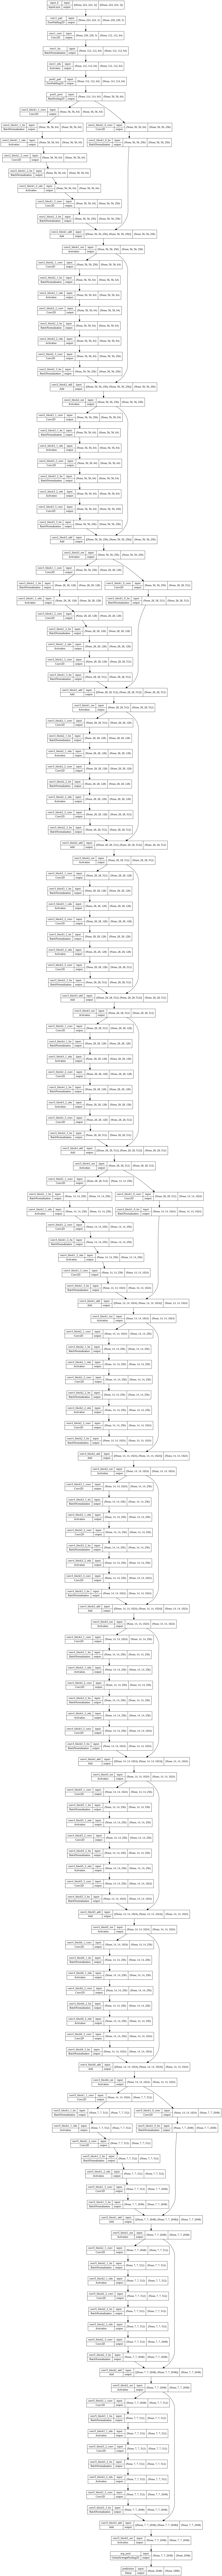

In [ ]:
keras.utils.plot_model(base_modelResNet50, show_shapes=True)

In [ ]:
base_modelResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


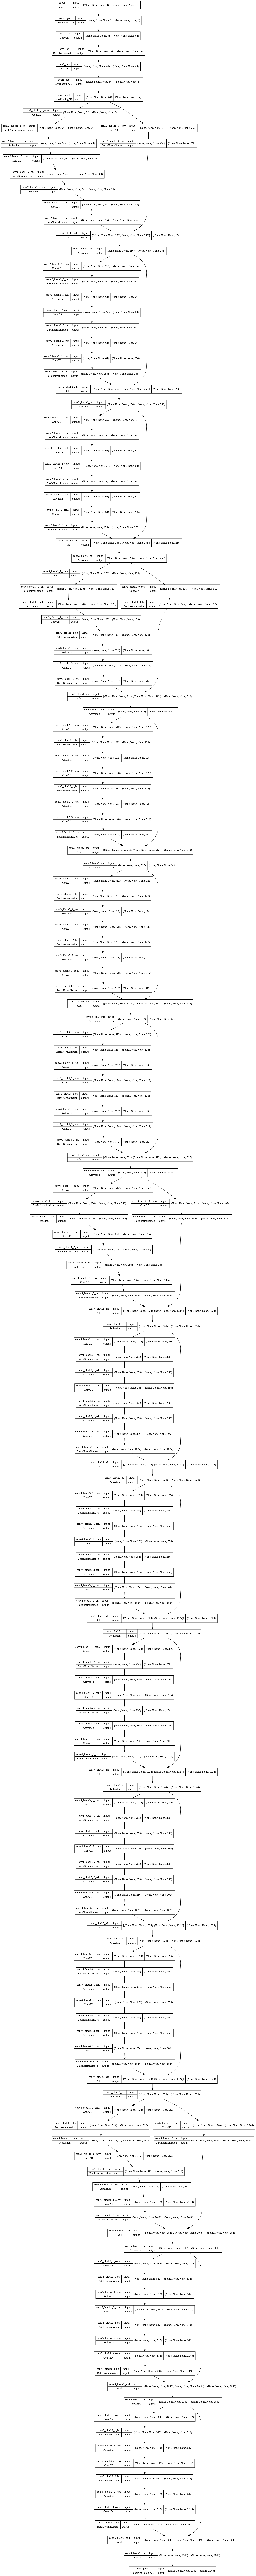

In [ ]:
keras.utils.plot_model(base_model, show_shapes=True)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
base_model=ResNet50(include_top=False, pooling='max', weights='imagenet')
for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

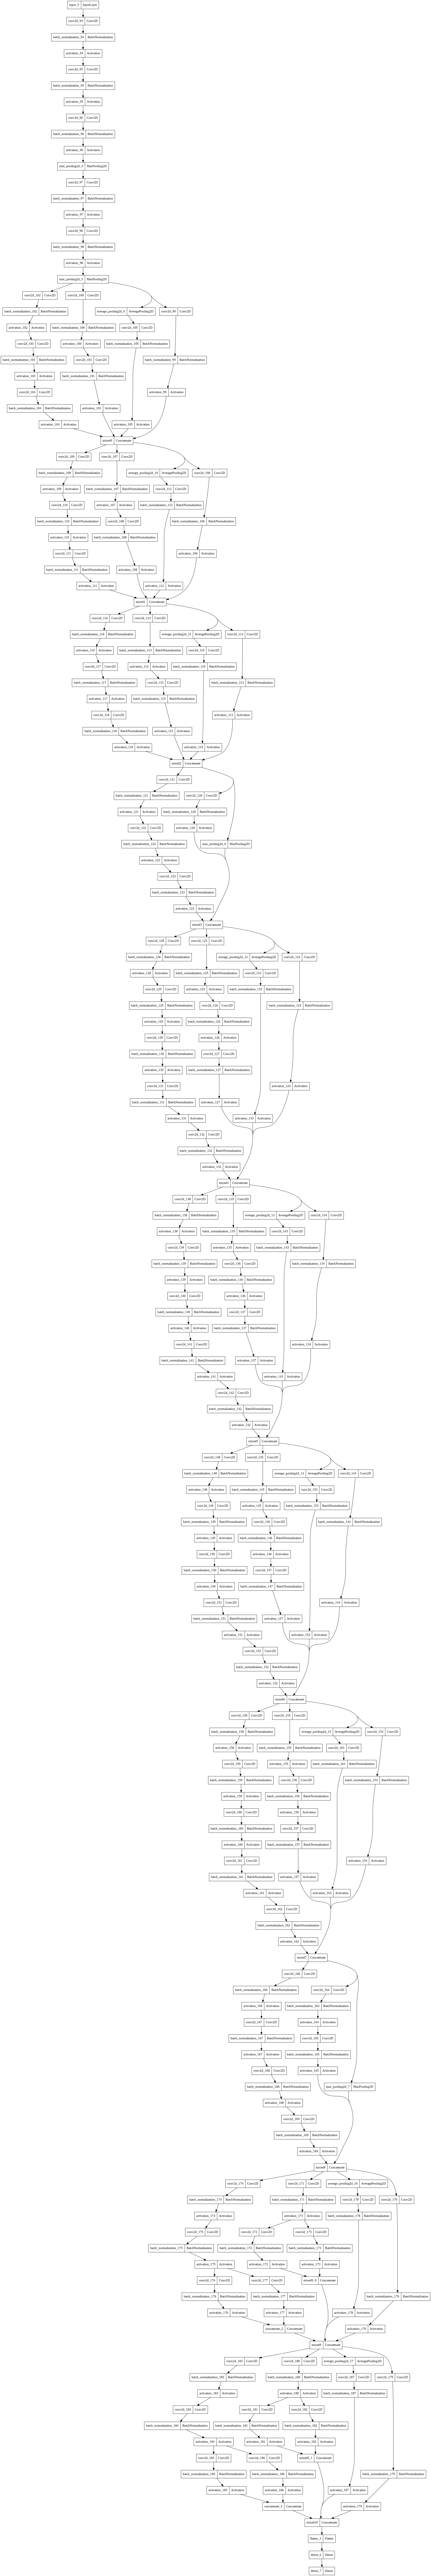

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
epochs=5
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=epochs, verbose=1)

Epoch 1/5
156/156 [==============================] - 173s 1s/step - loss: 0.8927 - accuracy: 0.6123 - val_loss: 0.6657 - val_accuracy: 0.6120
Epoch 2/5
156/156 [==============================] - 158s 1s/step - loss: 0.6248 - accuracy: 0.6510 - val_loss: 0.7521 - val_accuracy: 0.5884
Epoch 3/5
156/156 [==============================] - 158s 1s/step - loss: 0.6068 - accuracy: 0.6737 - val_loss: 0.5924 - val_accuracy: 0.6882
Epoch 4/5
156/156 [==============================] - 158s 1s/step - loss: 0.5733 - accuracy: 0.6939 - val_loss: 0.6209 - val_accuracy: 0.6556
Epoch 5/5
156/156 [==============================] - 158s 1s/step - loss: 0.5785 - accuracy: 0.6949 - val_loss: 0.6505 - val_accuracy: 0.6440


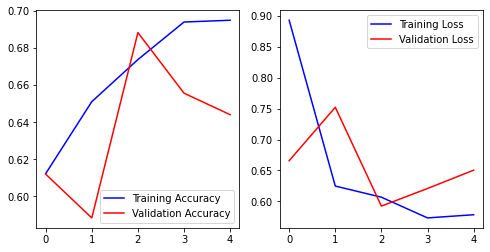

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD

In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
epochs=10
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=5, verbose=1)

Epoch 1/5
156/156 [==============================] - 230s 1s/step - loss: 0.2481 - accuracy: 0.9008 - val_loss: 0.2433 - val_accuracy: 0.9010
Epoch 2/5
156/156 [==============================] - 218s 1s/step - loss: 0.2076 - accuracy: 0.9174 - val_loss: 0.2104 - val_accuracy: 0.9173
Epoch 3/5
156/156 [==============================] - 217s 1s/step - loss: 0.1939 - accuracy: 0.9219 - val_loss: 0.2138 - val_accuracy: 0.9108
Epoch 4/5
156/156 [==============================] - 217s 1s/step - loss: 0.1687 - accuracy: 0.9320 - val_loss: 0.1933 - val_accuracy: 0.9226
Epoch 5/5
156/156 [==============================] - 217s 1s/step - loss: 0.1623 - accuracy: 0.9351 - val_loss: 0.1851 - val_accuracy: 0.9244


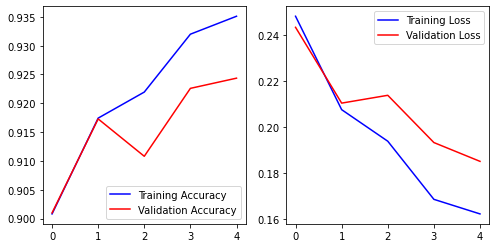

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [ ]:
model.save('/content/drive/My Drive/Datos/dogcatsmodels_vgg16.tf', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Datos/dogcatsmodels_vgg16.tf/assets


In [ ]:
model=keras.models.load_model('/content/drive/My Drive/Datos/dogcatsmodels_vgg16.tf')

In [ ]:
## Para una sola imagen
def load_image(filename):
  img = image.load_img(filename, target_size=(224, 224))
  img = image.img_to_array(img)
  img = img.reshape(224, 224, 3)
  img = img.astype('float32')
  return img

In [ ]:
Y_pred = model.predict(test_it)

In [ ]:
predictions_label=[(0 if element<0.5 else 1) for element in Y_pred]

In [ ]:
labels_test=test_it.labels

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm

array([[2414,  141],
       [ 184, 2351]])

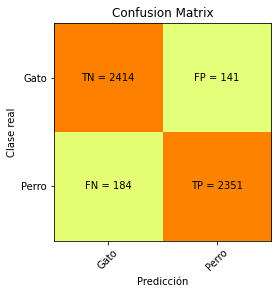

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Gato','Perro']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, predictions_label)
cm

array([[2414,  141],
       [ 184, 2351]])

In [ ]:
train_it.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
classes=list(train_it.class_indices.keys())

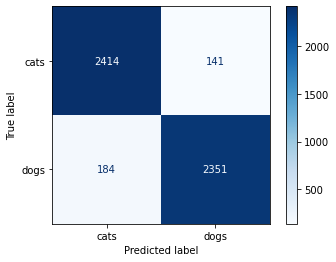

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
model = VGG19(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=10, verbose=1)

In [ ]:
Y_pred = model.predict(test_it)

In [ ]:
model.evaluate(test_it)

40/40 [==============================] - 52s 1s/step - loss: 0.2077 - accuracy: 0.9126


[0.20769253373146057, 0.9125736951828003]

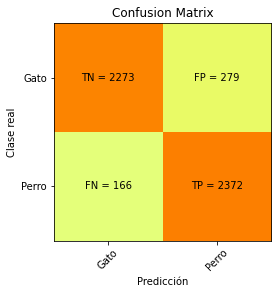

In [ ]:
predictions_label=[(0 if element<0.5 else 1) for element in Y_pred]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_it.labels, predictions_label)
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Gato','Perro']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
modelInceptionV3=InceptionV3()
modelInceptionV3.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
batch_size=16
train_it = datagen.flow_from_directory('/content/data_dogs_vs_cats/train', class_mode='binary', batch_size=batch_size, target_size=(299, 299))
test_it = datagen.flow_from_directory('/content/data_dogs_vs_cats/test', class_mode='binary', batch_size=batch_size, target_size=(299, 299),shuffle=False)

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


In [ ]:
model = InceptionV3(include_top=False, input_shape=(299, 299, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=test_it, validation_steps=len(test_it), 
                              epochs=10, verbose=1)

Epoch 1/10
1245/1245 [==============================] - 286s 223ms/step - loss: 0.4298 - accuracy: 0.9810 - val_loss: 0.1338 - val_accuracy: 0.9892
Epoch 2/10
1245/1245 [==============================] - 272s 219ms/step - loss: 0.1251 - accuracy: 0.9905 - val_loss: 0.0754 - val_accuracy: 0.9927
Epoch 3/10
1245/1245 [==============================] - 273s 219ms/step - loss: 0.0410 - accuracy: 0.9961 - val_loss: 0.1526 - val_accuracy: 0.9906
Epoch 4/10
1245/1245 [==============================] - 273s 219ms/step - loss: 0.0352 - accuracy: 0.9968 - val_loss: 0.1904 - val_accuracy: 0.9921
Epoch 5/10
1245/1245 [==============================] - 274s 220ms/step - loss: 0.0233 - accuracy: 0.9974 - val_loss: 0.1975 - val_accuracy: 0.9933
Epoch 6/10
1245/1245 [==============================] - 273s 220ms/step - loss: 0.0201 - accuracy: 0.9982 - val_loss: 0.1470 - val_accuracy: 0.9929
Epoch 7/10
1245/1245 [==============================] - 274s 220ms/step - loss: 0.0035 - accuracy: 0.9997 - val_

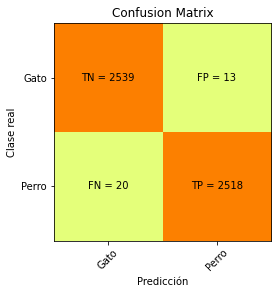

In [ ]:
Y_pred = model.predict(test_it)
predictions_label=[(0 if element<0.5 else 1) for element in Y_pred]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_it.labels, predictions_label)
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Gato','Perro']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()